# CORRELATION ANALYSIS
<br>
This dataframe will hilight the correlation analysis to prove or invalidate the following hypotheses:
<br>

* (Closer) Train proximity will increase earnings (approximate)
* (Closer) Proximity to the CBD will increase earnings (approximate)
* The Popularity of properties will be (positively) reflected in higher earnings



In [1]:
# import libraries
import math
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
pd.set_option('display.max_columns', None)

In [2]:
# import listings 2018 csv to pd dataframe
path="../02-Data_Files_Directory/02-Clean_Data/airbnbFINAL_Swobabika.csv"
airbnb_df = pd.read_csv(path, low_memory=False)

In [3]:
# Remove unused DF columns
airbnb_df2 = airbnb_df[['host_is_superhost',
           'city',
           'property_type',
           'accommodates',
           'amenities',
           'price',
           'reviews_per_month',
           'distance_from_cbd',
           'station_distance']].loc[airbnb_df['review_scores_rating'] != 0].copy()

# Round Distance from CBD column
airbnb_df2['distance_from_cbd'] = airbnb_df2['distance_from_cbd'].round(2)
# Create Price per day per person column
airbnb_df2['price_per_person']=airbnb_df2['price']/airbnb_df2['accommodates']
airbnb_df2.head()

,host_is_superhost,city,property_type,accommodates,amenities,price,reviews_per_month,distance_from_cbd,station_distance,price_per_person
0,t,St Kilda,Apartment,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",159.0,0.15,5.21,1.4,53.0
1,t,Richmond,Apartment,2,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,1.75,3.65,1.1,49.0
2,t,St Kilda,Apartment,4,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",190.0,0.60,5.44,1.2,47.5
3,t,Melbourne,Loft,4,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",228.0,2.07,0.07,0.5,57.0
4,t,Richmond,Apartment,4,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",138.0,0.46,2.79,0.5,34.5


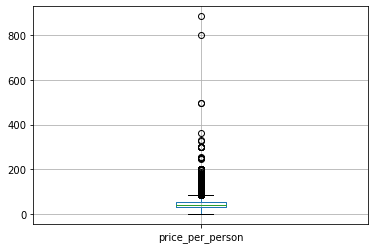

In [4]:
# Check for outliers
airbnb_df2.boxplot(column='price_per_person', return_type='axes')

In [5]:
# for testing Melbourne listings
airbnb_df3 = airbnb_df2.loc[(airbnb_df2['city'] == 'Melbourne')]

# filtering approximate outliers and add "Apartment" filter
pppfltr = airbnb_df2.loc[(airbnb_df2['price_per_person'] <= 100) & (airbnb_df2['property_type'] == 'Apartment')]

# check cities in plot DF
pppfltr['city'].unique()

array(['St Kilda', 'Richmond', 'Clifton Hill', 'Thornbury',
       'St Kilda East', 'Melbourne', 'Elwood', 'Middle Park',
       'North Melbourne', 'Fitzroy', 'Collingwood', 'Southbank',
       'South Yarra', 'Windsor', 'East Melbourne', 'Brunswick',
       'Elsternwick', 'Flemington', 'Port Melbourne', 'Caulfield South',
       'Balaclava', 'St Kilda West', 'Brunswick East', 'Carlton',
       'South Melbourne', 'Northcote', 'Toorak', 'Glen Iris',
       'Yarraville', 'Caulfield North', 'Prahran', 'Docklands',
       'Fitzroy North', 'Parkville', 'Heidelberg', 'Maribyrnong',
       'Brunswick West', 'Kew', 'West Melbourne', 'Abbotsford',
       'Camberwell', 'Hawthorn', 'Footscray', 'Ascot Vale', 'Preston',
       'Armadale', 'Brighton', 'Hawthorn East', 'Carlton North',
       'Kensington', 'Albert Park', 'Cremorne', 'Williamstown', 'Coburg',
       'Malvern East'], dtype=object)

In [6]:
# function for plotting and exporting images
def create_plot(x_values,y_values,title,x_label,y_label):
    # create scatter plot
    plt.figure(figsize=(10,8))    
    plt.scatter(x_values,y_values)
    plt.title(f'{title}')
    # calculate line variables
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    # calculate regress values
    regress_values = x_values * slope + intercept
    # add line and equation
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(max(x_values)/2,max(y_values)-(max(y_values)*.1)),fontsize=15,color="red")
    print(f"The r-value is {rvalue}")

    # add labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #save figure
    plt.savefig(f'../01-Project_Documents/01-Presentation_Slides/Correlation_Output/{title}.png')

    # print visualisation
    plt.show()

### DATA INFERENCE:
* Earnings has a slight positive correlation with distance from train station
* Properties have increased prospective earnings as they are located further from the train stations

The r-value is 0.09937352232200093


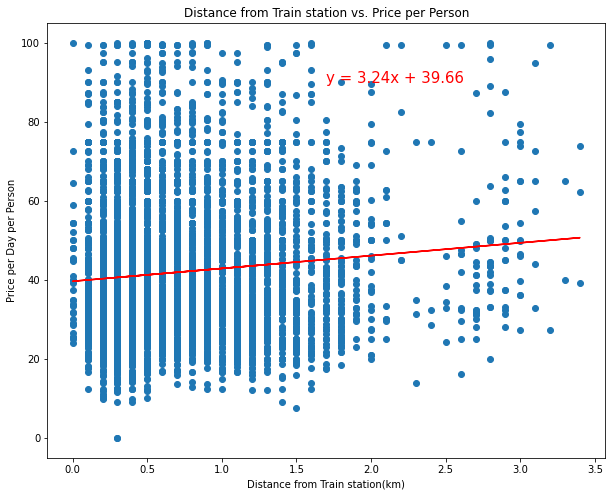

In [7]:
# function call for Distance from Train station vs. Price per Person
create_plot(pppfltr['station_distance'],
            pppfltr['price_per_person'],
            'Distance from Train station vs. Price per Person',
            'Distance from Train station(km)',
            'Price per Day per Person')

### DATA INFERENCE:
* Price per person has a weak positive correlation with distance from CBD
* Approximate earnings increase slightly for properties located further from the CBD

The r-value is 0.04262696146780292


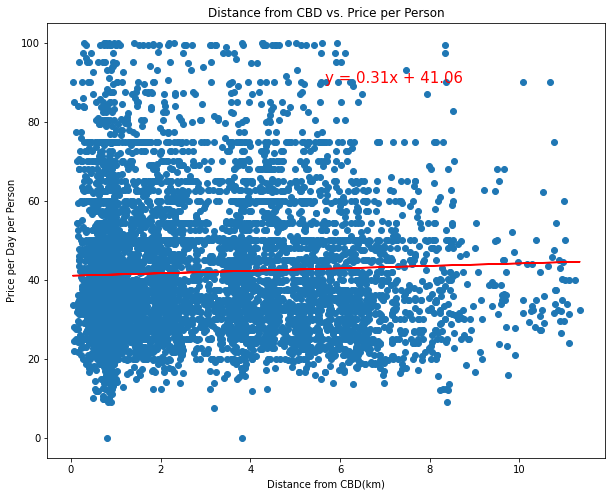

In [8]:
# function call for Distance from Train station vs. Price per Person
create_plot(pppfltr['distance_from_cbd'],
            pppfltr['price_per_person'],
            'Distance from CBD vs. Price per Person',
            'Distance from CBD(km)',
            'Price per Day per Person')

### DATA RESULTS:
* Popularity has a weak negative correlation with prospective earnings
* Listings with higher prospective earnings are less popular than listings with lower prospective  earnings

The r-value is -0.22278695277450122


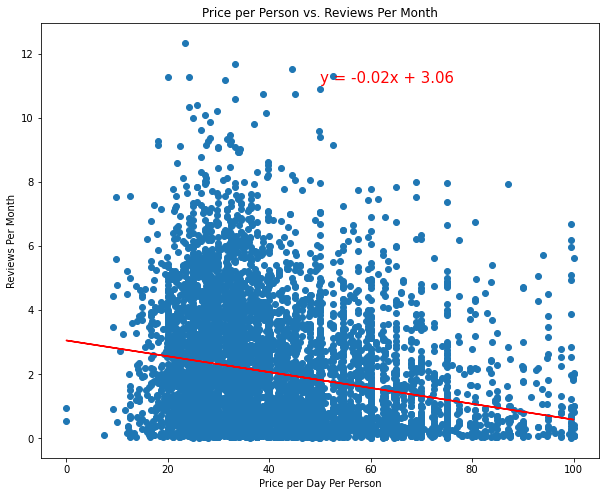

In [9]:
# function call for Reviews per month vs. Price per Person
create_plot(pppfltr['price_per_person'],
            pppfltr['reviews_per_month'],
            'Price per Person vs. Reviews Per Month',
            'Price per Day Per Person',
            'Reviews Per Month')